### Credit Card Fraud Detection 

In a hypothetical scenario, I was hired to assist a credit card company in identifying potential instances of fraud to safeguard their customers. The provided dataset comprises transactions between individuals, categorized as either fraud or not fraud. The current task at hand is to train a model capable of accurately distinguishing between these two categories. The essence of this project lies in constructing and evaluating various classification models that can effectively differentiate and identify fraudulent transactions.

### Steps involved
1. Importing the required packages.
2. Importing the data.
3. Data Processing and Exploratory Data Analysis.
4. Feature Selection and Data Split.
5. Building of classification models.
6. Evaluation of the created classification models.



### Importing the required packages 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



### Importing the data

In [3]:
# the dataset can be found at https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download
__path__ = "/home/robert/Documents/creditcard.csv" #path of were the dataset exists 

df = pd.read_csv(__path__)
df.drop('Time',axis=1,inplace=True)

print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

The dataset includes features labeled as V1 to V28, which represent the principal components obtained through PCA (Principal Component Analysis). The variable indicating the time of the transactions is disregarded as it is deemed irrelevant for the task at hand. The remaining two features in the dataset are the transaction amount and the label indicating whether the transaction is fraudulent or not.


### Data Processing and EDA

To gain a better understanding of the distribution of distinct cases in the dataset, we will first examine the number of fraudulent and non-fraudulent cases. Then, we will calculate the percentage of these cases in relation to the total number of recorded transactions.

Once this information is analyzed, we can obtain insights into the relative frequency of fraudulent transactions compared to the overall dataset.


In [4]:
cases = len(df)
non_fraudulent_count = df[df.Class == 0]
fraudulent_count = df[df.Class == 1]

fraudulent_percent = round(len(fraudulent_count)/cases * 100,2)

print(f"Total amount of transactions: {cases}")
print(f"Number of non-fraudulent cases are: {len(non_fraudulent_count)}")
print(f"Number of fraudulent cases are: {len(fraudulent_count)}")
print(f"The percentage of fraudulent cases are approximately: {fraudulent_percent}%")



Total amount of transactions: 284807
Number of non-fraudulent cases are: 284315
Number of fraudulent cases are: 492
The percentage of fraudulent cases are approximately: 0.17%


As observed, the total number of fraudulent transactions represents only approximately 0.17% of the total number of cases, which aligns with expectations. Consequently, we are confronted with highly imbalanced data that necessitates careful handling to achieve balance.

Now, let's proceed with a statistical overview of both classes. By examining various statistical measures, we can gain a deeper understanding of the characteristics and distribution of the fraudulent and non-fraudulent transaction classes.

In [5]:
print("---- Non-Fraudulent cases ----")
print(non_fraudulent_count.Amount.describe())
print("----------------------------")
print("---- Fraudulent cases ----")
print(fraudulent_count.Amount.describe())
print("----------------------------")

---- Non-Fraudulent cases ----
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
----------------------------
---- Fraudulent cases ----
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
----------------------------


Given that certain algorithms, such as KNN (K-Nearest Neighbors) and SVM (Support Vector Machines), are sensitive to the scale of input features, it is crucial to standardize the features for this specific case, especially the "amount" feature. Standardization involves transforming the input features to have a zero mean and unit variance.

By standardizing the input features, we ensure that their scales are comparable, which ultimately enhances the performance and effectiveness of these algorithms in handling the data. This process enables fair and unbiased comparisons between different features, preventing any single feature from dominating the algorithm's calculations due to its larger magnitude.

In [6]:
standard_scaler = StandardScaler()
df['Amount'] = standard_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Amount'].head(10)

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64

### Feature Selection and Data Split

We will now split the data into train and test sets. To accomplish this, we can utilize the train_test_split function from the sklearn library.


In [7]:
X = df.drop('Class',axis=1).values
y = df['Class'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

### Building of classification models

In this step, we will build six different classification models: Decision Tree, K-nearest Neighbors, Logistic Regression, Support Vector Machine, Random Forest, and XGBoost.

In [8]:
#1. Decisoin Tree
decision_tree = DecisionTreeClassifier(max_depth=4,criterion='entropy')
decision_tree.fit(X_train,y_train)
decision_tree__test = decision_tree.predict(X_test)

#2. K-Nearest Neighbors
n = 5
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,y_train)
knn_test = knn.predict(X_test)

#3. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg_test = log_reg.predict(X_test)

#4. SVM
svm = SVC()
svm.fit(X_train,y_train)
svm_test = svm.predict(X_test)

#5. Random Forest Tree
ran_for = RandomForestClassifier(max_depth=4)
ran_for.fit(X_test,y_test)
ran_for_test = ran_for.predict(X_test)

#6. XGBoost
xgb = XGBClassifier(max_depth=4)
xgb.fit(X_train,y_train)
xgb_test = xgb.predict(X_test)




### Evaluation 
n this stage, we will evaluate the trained models with the objective of finding the best-performing model in terms of accuracy. We will review metrics such as accuracy, F1 score, and, finally, the confusion matrix

In [9]:
#1. Accuracy score

print('---ACCURACY SCORE---')
print(f"Accuracy score of the Decision Tree model is {accuracy_score(y_test, decision_tree__test)}")
print('------------------------------------------------------------------------')
print(f"Accuracy score of the KNN model is {accuracy_score(y_test, knn_test)}")
print('------------------------------------------------------------------------')
print(f"Accuracy score of the Logistic Regression model is {accuracy_score(y_test, log_reg_test)}")
print('------------------------------------------------------------------------')
print(f"Accuracy score of the SVM model is {accuracy_score(y_test, svm_test)}")
print('------------------------------------------------------------------------')
print(f"Accuracy score of the Random Forest Tree model is {accuracy_score(y_test, ran_for_test)}")
print('------------------------------------------------------------------------')
print(f"Accuracy score of the XGBoostmodel is {accuracy_score(y_test, xgb_test)}")
print('------------------------------------------------------------------------')

#2. F1 score 
print('---F1 SCORE---')
print(f"F1 score of the Decision Tree model is {f1_score(y_test, decision_tree__test)}")
print('------------------------------------------------------------------------')
print(f"F1 score of the KNN model is {f1_score(y_test, knn_test)}")
print('------------------------------------------------------------------------')
print(f"F1score of the Logistic Regression model is {f1_score(y_test, log_reg_test)}")
print('------------------------------------------------------------------------')
print(f"F1 score of the SVM model is {f1_score(y_test, svm_test)}")
print('------------------------------------------------------------------------')
print(f"F1 score of the Random Forest Tree model is {f1_score(y_test, ran_for_test)}")
print('------------------------------------------------------------------------')
print(f"F1 score of the XGBoostmodel is {f1_score(y_test, xgb_test)}")
print('------------------------------------------------------------------------')




---ACCURACY SCORE---
Accuracy score of the Decision Tree model is 0.999385555282469
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9995611109160493
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9990519995786665
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9994557775359011
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9995786664794073
------------------------------------------------------------------------
Accuracy score of the XGBoostmodel is 0.9994908886626171
------------------------------------------------------------------------
---F1 SCORE---
F1 score of the Decision Tree model is 0.8258706467661692
------------------------------------------------------------------------
F1 score of the KNN model is

---Decision Tree---


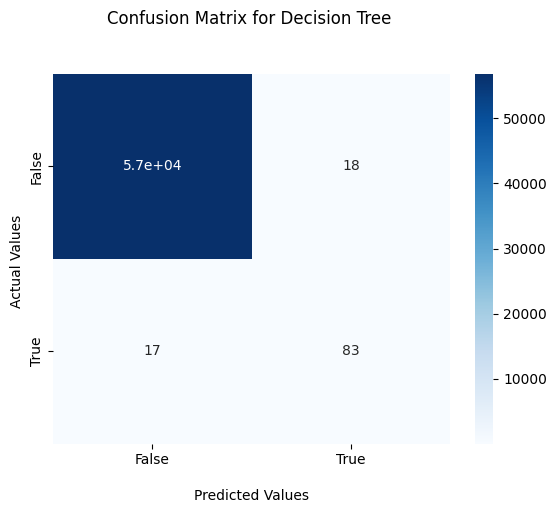

None
------------------------------------------------


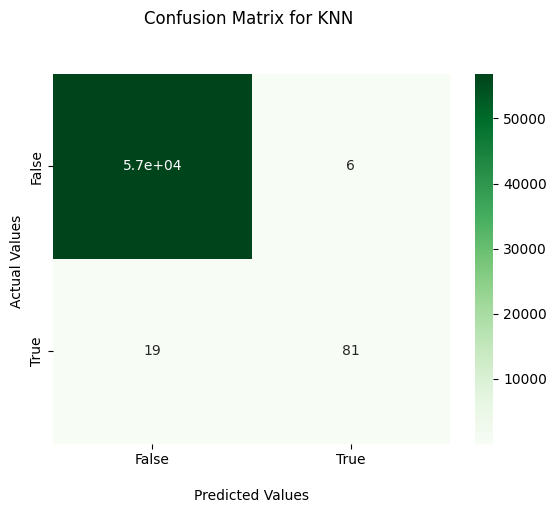

None
------------------------------------------------


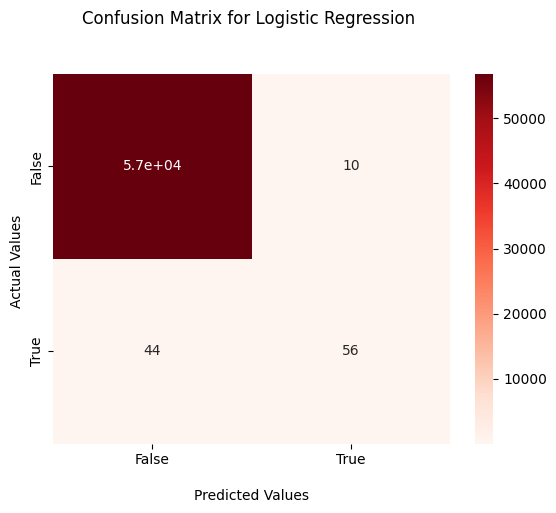

None
------------------------------------------------


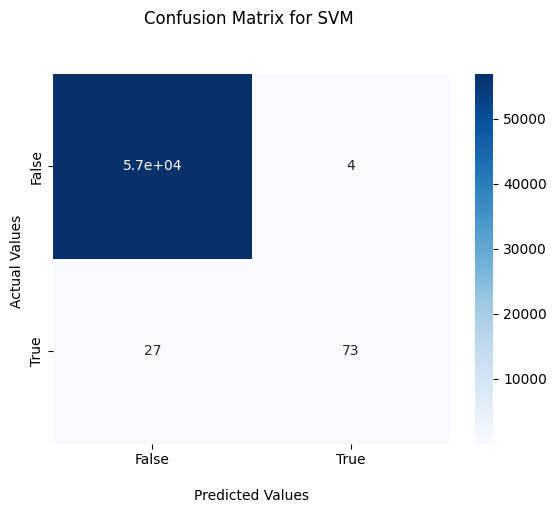

None
------------------------------------------------


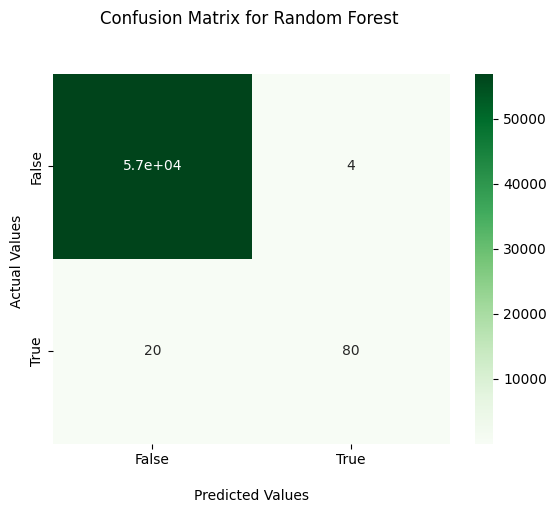

None
------------------------------------------------


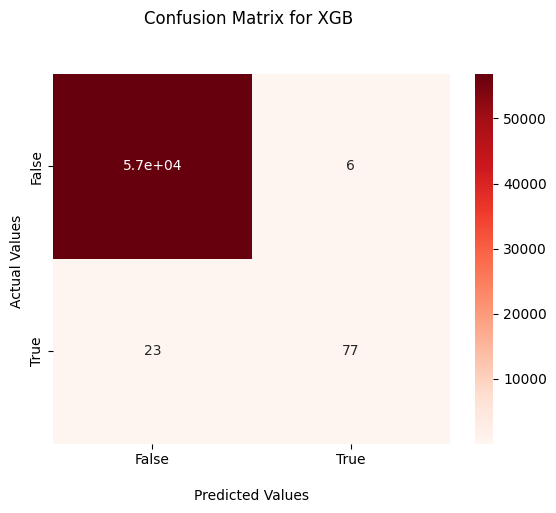

None


In [15]:
def plot_conf(conf_matrix,color,model):


    ax = sns.heatmap(conf_matrix, annot=True, cmap=color)
    ax.set_title(f"Confusion Matrix for {model} \n\n");
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()
print("---Decision Tree---")
print(plot_conf(confusion_matrix(y_test, decision_tree__test, labels = [0, 1]),'Blues',"Decision Tree"))
print("------------------------------------------------")
print(plot_conf(confusion_matrix(y_test, knn_test, labels = [0, 1]),'Greens',"KNN"))
print("------------------------------------------------")
print(plot_conf(confusion_matrix(y_test, log_reg_test, labels = [0, 1]),'Reds',"Logistic Regression"))
print("------------------------------------------------")
print(plot_conf(confusion_matrix(y_test, svm_test, labels = [0, 1]),'Blues',"SVM"))
print("------------------------------------------------")
print(plot_conf(confusion_matrix(y_test, ran_for_test, labels = [0, 1]),'Greens',"Random Forest"))
print("------------------------------------------------")
print(plot_conf(confusion_matrix(y_test, xgb_test, labels = [0, 1]),'Reds',"XGB"))


### Discussion

Firstly, when considering the accuracy metric, it becomes challenging to determine which of the models is performing the best since all of them exhibit very high accuracy. However, upon examining the f1 score, it becomes evident that the top two performing models are K-nearest Neighbors (KNN) and Random Forest Tree. To further investigate and gain deeper insights into identifying the best model, I also analyzed the confusion matrix. After studying the true positives, false positives, and vice verca, it appears that the KNN model performs the best. Although there are numerous other models to explore, these models serve as a compelling example, demonstrating the power of machine learning.